<a href="https://colab.research.google.com/github/cristianquiroz6211/Introducci-n-a-regresi-n-lineal/blob/main/Regresion_lineal_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a regresión lineal
La regresión lineal es un enfoque estadístico utilizado para modelar la relación entre una variable dependiente y una o más variables independientes. Su propósito principal es predecir el valor de la variable dependiente a partir de los valores de las variables independientes, asumiendo que hay una relación lineal entre ellas.

¿Por qué usar regresión lineal?
La regresión lineal es útil cuando se quiere entender cómo una o más variables afectan a una variable de interés. Además, permite predecir resultados futuros basándose en datos históricos. Se utiliza en diversas disciplinas, como economía, ingeniería, biología, marketing, entre otras.

https://www.linkedin.com/in/cristianquiroz1034916211/




## Importando datos

# 🏡Sobre el Conjunto de Datos de Viviendas de Boston
Este conjunto de datos proviene del Repositorio de Aprendizaje Automático de UCI y se centra en los valores de las viviendas en los suburbios de Boston.


---


Contenido
El dataset contiene 506 instancias, cada una con 14 atributos que describen características de las propiedades y su entorno.

Descripción de los Atributos
A continuación, se detalla la información de cada columna:

CRIM: Tasa de criminalidad per cápita por ciudad.

ZN: Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.

INDUS: Proporción de acres de negocios no minoristas por ciudad.

CHAS: Variable ficticia para el río Charles (1 si el tramo limita con el río; 0 en caso contrario).

NOX: Concentración de óxidos nítricos (partes por 10 millones).

RM: Número medio de habitaciones por vivienda.

AGE: Proporción de unidades ocupadas por sus dueños construidas antes de 1940.

DIS: Distancias ponderadas a cinco centros de empleo de Boston.

RAD: Índice de accesibilidad a carreteras radiales.

TAX: Tasa de impuesto a la propiedad sobre el valor total por cada $10,000.

PTRATIO: Ratio de estudiantes por profesor en la ciudad.

B: Una métrica que representa la proporción de población afroamericana en la ciudad.

LSTAT: Porcentaje de la población considerada de "estatus inferior".

MEDV: Valor medio de las viviendas ocupadas por sus dueños en miles de dólares (esta es la variable objetivo).





---


Detalles Adicionales
Valores Faltantes: Ninguno.


---


Fuente: https://archive.ics.uci.edu/ml/datasets/Housing

https://www.kaggle.com/datasets/heptapod/uci-ml-datasets


In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Entendiendo los datos
Antes de trabajar con la regresion lineal, hay que entender los datos, para esto Nos vamos a apoyar de una IA, le hemos pasado los atributos anteriormente descritos y le hemos pedido que nos ayude a generar un grafico de correlacion para entender que datos tenemos.


---

Se muestra el codigo generado por el chatbot

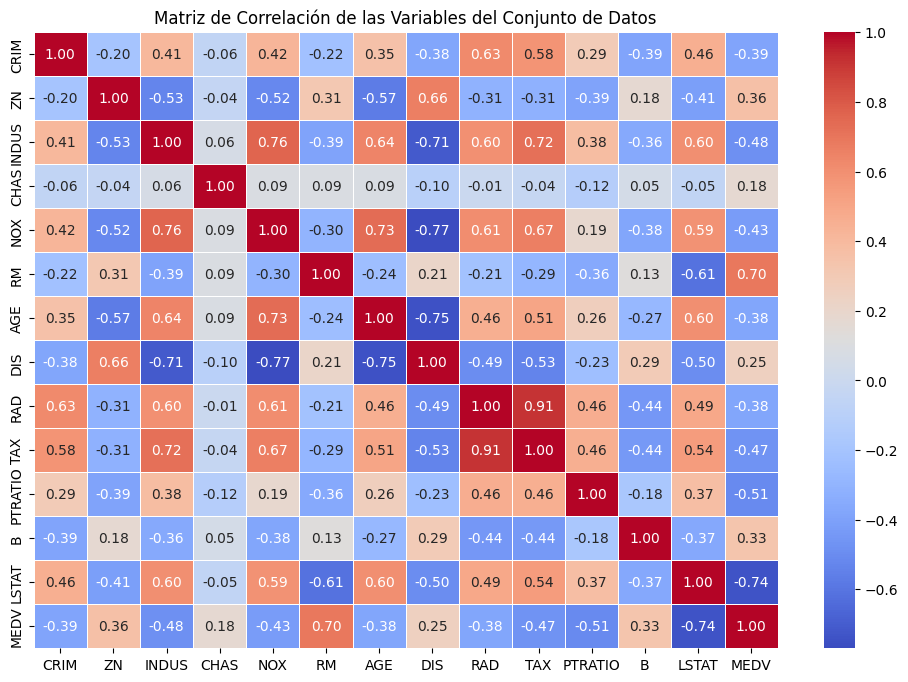

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear el gráfico de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de las Variables del Conjunto de Datos')
plt.show()


Aquí tienes la matriz de correlación de las variables de tu conjunto de datos. Las correlaciones se muestran con valores entre -1 y 1, donde:

1 indica una correlación positiva perfecta,

-1 indica una correlación negativa perfecta,

0 indica que no hay correlación.

En este gráfico, las variables que están más fuertemente correlacionadas entre sí se muestran con colores más intensos. Puedes observar que algunas variables, como RM (número medio de habitaciones por vivienda) y MEDV (valor medio de las viviendas), presentan una fuerte correlación positiva, lo que sugiere que a medida que aumenta el número de habitaciones, también tiende a aumentar el valor de las viviendas.

**Respuesta dada por ChatGPT**


---

Vamos a usar regresion lineal para predecir la variable MEDV, por lo cual vamos a reducir todas nuestras variables a las cuales tengas una mejor correlacion con nuestra variable objetivo.

Correlación de MEDV con otras variables:
MEDV    1.000000
RM      0.695360
ZN      0.360445
B       0.333461
DIS     0.249929
CHAS    0.175260
Name: MEDV, dtype: float64


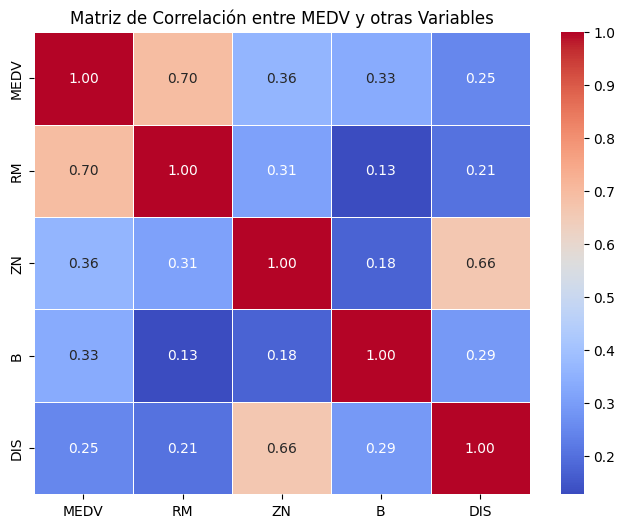

In [12]:
# Correlación de MEDV con otras variables
medv_correlations = correlation_matrix['MEDV'].sort_values(ascending=False)



correlation_positive = medv_correlations[medv_correlations > 0]
print("Correlación de MEDV con otras variables:")
print(correlation_positive)

""" Voy a eliminar la variable CHAS ya que su correlación es baja con MEDV """
# Seleccionar las columnas especificadas para la matriz de correlación
selected_columns = ['MEDV', 'RM', 'ZN', 'B', 'DIS']

# Calcular la matriz de correlación solo con las variables seleccionadas
correlation_matrix_selected = df[selected_columns].corr()

# Crear el gráfico de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre MEDV y otras Variables')
plt.show()




Haciendo un analisis visual de los datos que tienen una correlacion > 1 con MEDV vemos que la variable que mas se correlaciona es RM. estando en 0.70 de un rango de [-1,1]


---
Con base a esto ya sabemos que la variable RM es la cual más se correlaciona  y es la que vamos a usar para intentar predecir.


---

Vamos a usar scikit-learn para crear nuestro modelo.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


## Creando el modelo con scikit-learn
primero pasamos los valores de dataframe a numpy aaray de los datos que tenemos.


---
Para utilizar eficientemente scikit-learn, es una práctica común convertir los DataFrames de pandas a arrays de NumPy, aunque scikit-learn puede aceptar directamente los DataFrames. Los arrays de NumPy son la estructura de datos principal para las operaciones numéricas en Python, lo que permite un procesamiento más rápido y eficiente.

---
pasa de ser <class 'pandas.core.frame.DataFrame'> a ser
<class 'numpy.ndarray'> utilizando [].values
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html


---


StandardScaler es una herramienta de preprocesamiento de datos de la biblioteca scikit-learn en Python. Su propósito es estandarizar las características de un conjunto de datos, lo que significa transformar los datos para que cada característica tenga una media de 0 y una desviación estándar de 1.

Cómo funciona
StandardScaler utiliza la siguiente fórmula para estandarizar cada punto de datos (x):

z=(x−μ)/σ

donde:

x es el valor original.

μ es la media de los valores de la característica.

σ es la desviación estándar de los valores de la característica.

Este proceso también se conoce como normalización por Z-score. Al aplicar esta transformación, se asegura que las características tengan la misma escala, lo cual es crucial para muchos algoritmos de aprendizaje automático.


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df[['RM']].values.reshape(-1,1)
y = df['MEDV'].values.reshape(-1,1)

sc_x = StandardScaler()
sc_y = StandardScaler()



X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)


LinearRegression()

Explicacion de que se hizo:


---
X = df[['RM']].values.reshape(-1,1):

Se selecciona la variable RM (número medio de habitaciones por vivienda) como la característica independiente o predictor.

df[['RM']] extrae la columna RM del DataFrame df en formato DataFrame, pero luego .values convierte este DataFrame en un array de NumPy.

.reshape(-1,1) convierte el array 1D en una matriz 2D, con una columna y múltiples filas. Esto es necesario para que el modelo de regresión lineal pueda aceptar este formato de entrada.

y = df['MEDV'].values.reshape(-1,1):

Se selecciona la variable MEDV (valor medio de las viviendas) como la variable dependiente o la que se quiere predecir.

Al igual que con X, el valor de MEDV se convierte en un array de NumPy y se remodela en una matriz 2D con .reshape(-1,1).


---
sc_x = StandardScaler() y sc_y = StandardScaler():

Se crean dos objetos StandardScaler de sklearn.preprocessing, uno para las variables X (entrada) y otro para y (salida).

StandardScaler es una técnica de normalización que estandariza las variables, restando la media y dividiendo por la desviación estándar, lo que permite que los datos tengan una distribución con media 0 y desviación estándar 1.


---

X_std = sc_x.fit_transform(X):

fit_transform(X) ajusta el escalador a las características de X y luego las transforma. La transformación consiste en restar la media de X y dividir por su desviación estándar, obteniendo la variable normalizada X_std.

y_std = sc_y.fit_transform(y):

De manera similar, fit_transform(y) ajusta el escalador de y a la variable y y luego la transforma. La transformación para y también consiste en centrar los datos y escalarlos.

---

slr = LinearRegression():

Se crea un objeto de regresión lineal utilizando la clase LinearRegression de sklearn.linear_model.

Este modelo ajusta una línea recta a los datos de entrada para predecir el valor de y a partir de X.

slr.fit(X_std, y_std):

Aquí, el modelo de regresión lineal (slr) se ajusta a los datos estandarizados de X y y. Este paso permite al modelo aprender la relación entre las características de entrada (X_std) y las etiquetas de salida (y_std) para hacer predicciones futuras.


---

Este código está preparando y entrenando un modelo de regresión lineal en el que las variables de entrada y salida son normalizadas antes de ser usadas para el ajuste del modelo. La normalización es importante cuando las características tienen diferentes escalas o unidades, ya que asegura que el modelo no favorezca una variable sobre otra debido a diferencias en su magnitud. Este es un paso común en la regresión lineal y otros modelos de machine learning.



## Análisis de resultados

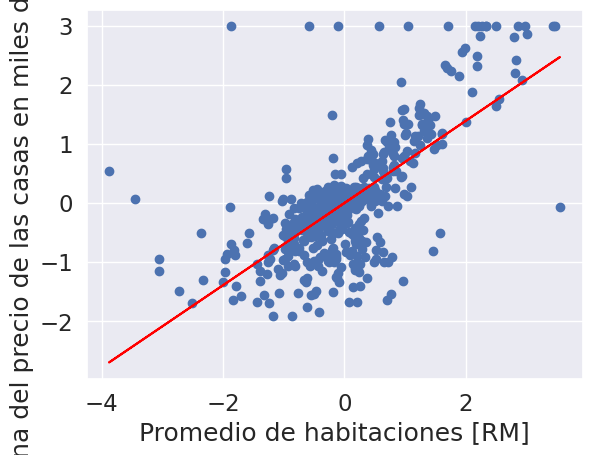

In [28]:
plt.scatter(X_std,y_std)
plt.plot(X_std,slr.predict(X_std),color='red')
plt.ylabel('Mediana del precio de las casas en miles de $ [MEDV]')
plt.xlabel('Promedio de habitaciones [RM]')
plt.show()


## Generando predicción con el modelo

Ya podemos usar nuestro modelo para hacer predicciones en base a el numero de habitaciones


In [32]:
num_habitaciones = 5
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))
print(f"{slr.predict(num_habitaciones_std)}, Despues de aplicar la transformada inversa queda {sc_y.inverse_transform(slr.predict(num_habitaciones_std))}")


[[-1.2726238]], Despues de aplicar la transformada inversa queda [[10.83992413]]


In [33]:
#Funcion de perdida
from sklearn.metrics import mean_squared_error, r2_score
y_pred = slr.predict(X_std)
mse = mean_squared_error(y_std, y_pred)
r2 = r2_score(y_std, y_pred)
print(f"MSE: {mse}")
print(f"R2: {r2}")

MSE: 0.5164745440086659
R2: 0.483525455991334


# Conclusiones

MSE (Error Cuadrático Medio): 0.5165
El MSE mide la diferencia promedio al cuadrado entre los valores predichos por el modelo y los valores reales de la variable dependiente (en este caso, MEDV).

Interpretación:

Un MSE bajo indica que el modelo está haciendo predicciones bastante cercanas a los valores reales.

Un MSE alto indica que el modelo está cometiendo errores significativos al predecir los valores de la variable dependiente.

En este caso, un MSE de 0.5165 sugiere que el modelo no está haciendo grandes errores en sus predicciones, pero todavía hay margen de mejora.

2. R² (Coeficiente de Determinación): 0.4835
El R² es una medida que indica qué tan bien el modelo explica la variabilidad de la variable dependiente. Su valor oscila entre 0 y 1:

R² = 1 significa que el modelo explica el 100% de la variabilidad de los datos.

R² = 0 significa que el modelo no explica nada de la variabilidad de los datos (es equivalente a predecir la media de los valores).

Interpretación:

Un R² de 0.4835 indica que el modelo explica aproximadamente el 48.35% de la variabilidad en MEDV utilizando la variable RM.

Esto sugiere que más de la mitad de la variabilidad de MEDV no está siendo capturada por el modelo, lo que implica que otros factores pueden estar influyendo en el valor de las viviendas y no solo el número de habitaciones.

Resumen:
MSE (0.5165): El modelo tiene un error promedio moderado en sus predicciones. No es extremadamente bueno ni malo, pero hay espacio para mejorar.

R² (0.4835): El modelo captura aproximadamente el 48.35% de la variabilidad en los valores de las viviendas. Esto sugiere que hay otros factores que influyen en los valores de MEDV que no están siendo considerados en este modelo, como otras variables además de RM.

En conclusión, el modelo es moderadamente efectivo, pero con una R² de 0.48, probablemente sea necesario agregar más características o usar un enfoque más complejo para mejorar su rendimiento.

## Regresión Lineal Multivariable

Ahora vamos a usar una regresión multivariable para intentar mejorar nuestra predicción. Utilizaremos las variables 'RM' (número medio de habitaciones) y 'ZN' (proporción de terreno residencial zonificado) como variables independientes para predecir 'MEDV' (valor medio de las viviendas).

La regresión lineal multivariable (o múltiple) es una técnica estadística que crea un modelo lineal para predecir el valor de una variable dependiente (respuesta) a partir de dos o más variables independientes (predictores). A diferencia de la regresión lineal simple, que utiliza solo una variable predictora, la multivariable es más adecuada para escenarios complejos donde varios factores pueden influir en el resultado.

Características Clave Variables: Consiste en una variable dependiente (Y) y múltiples variables independientes (X_1,X_2, \dots,X_p). Por ejemplo, el precio de una vivienda (Y) puede depender de su tamaño (X_1), el número de habitaciones (X_2) y la ubicación (X_3).

Ecuación del modelo: Se representa por la fórmula: Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p + \epsilon Donde  β0  es el intercepto,  β1  a  βp  son los coeficientes que indican el impacto de cada variable independiente en Y, y  ϵ  es el término de error.

Objetivos:

Predicción: Permite predecir el valor de la variable dependiente al conocer los valores de las variables independientes.

Análisis de la influencia: Ayuda a entender y cuantificar el impacto individual de cada variable independiente sobre la dependiente, manteniendo las demás constantes.



In [ ]:
X_multi = df[['RM','ZN']]
y_multi = df['MEDV'].values.reshape(-1,1)

multi_sc_y = StandardScaler()
multi_sc_x = StandardScaler()



X_multi_std = multi_sc_x.fit_transform(X_multi)
y_multi_std = multi_sc_y.fit_transform(y_multi)

multi_slr = LinearRegression()
multi_slr.fit(X_multi_std, y_multi_std)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x1_range = np.arange(df['RM'].min(), df['RM'].max())
x2_range = np.arange(df['ZN'].min(), df['ZN'].max())

x1,x2 = np.meshgrid(x1_range,x2_range)
plano = pd.DataFrame({'RM':x1.ravel(),'ZN':x2.ravel()})
# Use .values to convert the DataFrame to a NumPy array for prediction
pred = multi_slr.predict(plano.values).reshape(x1.shape)
pred = multi_sc_y.inverse_transform(pred)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1,x2,pred,alpha= 0.4)
ax.scatter(df['RM'],df['ZN'],df['MEDV'],color='red',marker='.')

ax.view_init(elev=20,azim= 120) # Adjusted viewing angle
ax.set_xlabel('RM')
ax.set_ylabel('ZN')
ax.set_zlabel('MEDV')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

y_multi_pred = multi_slr.predict(X_multi_std)
mse_multi = mean_squared_error(y_multi_std, y_multi_pred)
print(f"Mean Squared Error (Multiple Regression): {mse_multi}")

#calcular r^2
from sklearn.metrics import r2_score
r2_multi = r2_score(y_multi_std, y_multi_pred)
print(f"R^2 (Multiple Regression): {r2_multi}")